# Proyecto. Métodos de clustering para series de tiempo
Por: Federico Salinas Samaniego

## Fase 1. Exploración de datos y muestreo

Carga de librerías

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplcatppuccin
import numpy as np

from collections import Counter
from Metricas_Clusters import group_colors

mpl.style.use("mocha")
plt.rcParams.update({
    "text.usetex": True
})

Lectura de archivos con datos de entrenamiento y prueba en un solo diccionario

In [2]:
class_dataseries = dict()

with open("../StarLightCurves/StarLightCurves_TRAIN.txt", "r") as input_data:
    for n, line in enumerate(input_data.readlines()):
        line_split = line.split("  ")[1:]
        class_series, data_series = int(line_split[0][1]), np.array([float(val_string) for val_string in line_split[1:]])

        mean_series = data_series.mean()
        std_series = data_series.std()
        data_series = (data_series - mean_series)/std_series
        class_dataseries[n] = (class_series, data_series)

sample_dataset = [list(series_info) for n, series_info in enumerate(class_dataseries.values())]

Obtención de clases por serie de tiempo para el conjunto completo de datos

In [3]:
classes, _ = zip(*class_dataseries.values())
classes_counter = dict(Counter(classes))

print(classes_counter, sum(classes_counter.values()))

{3: 573, 1: 152, 2: 275} 1000


### Muestreo de la población de series de tiempo

Obtención de muestra de series de tiempo

In [4]:
classes_sample, _ = zip(*sample_dataset)
classes_sample_counter = dict(Counter(classes_sample))

print(classes_sample_counter, sum(classes_sample_counter.values()))

{3: 573, 1: 152, 2: 275} 1000


### Visualización de series de tiempo

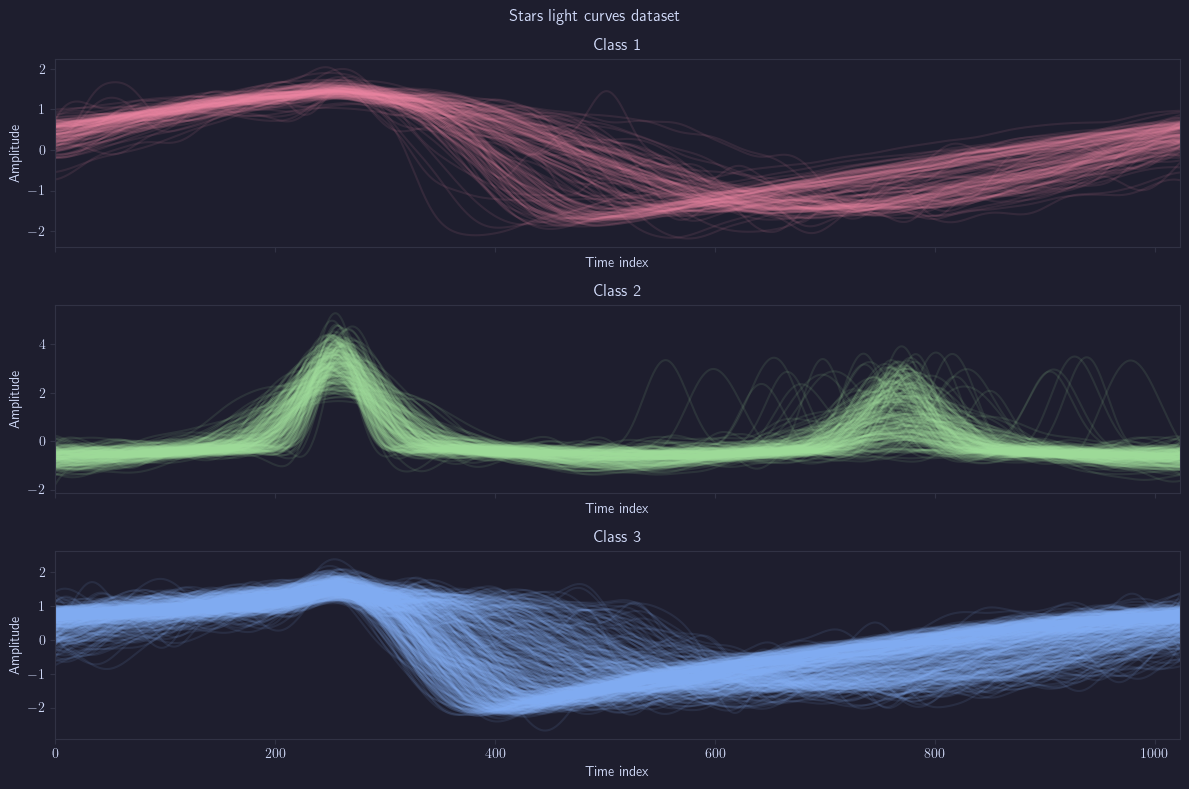

In [5]:

Figure, Subplot = plt.subplots(3, 1, sharex = "all", figsize=(12, 8))
Figure.suptitle("Stars light curves dataset")

for class_data, series_data in sample_dataset:
    Subplot[class_data - 1].plot(series_data, alpha = 0.1, color = group_colors[class_data])

for k in range(1,4):
    Subplot[k-1].set_title(f"Class {k}")
    Subplot[k-1].set_xlabel("Time index")
    Subplot[k-1].set_ylabel("Amplitude")
    Subplot[k-1].set_xlim(0, 1023)

Figure.tight_layout()
plt.show()

### Almacenamiento de muestra de series de tiempo

In [6]:
with open("../input data/StarLightCurves_sample.txt", "+w") as sample_file:
    for class_data, data_series in sample_dataset:
        sample_file.write(f"{class_data} " + " ".join([str(val) for val in data_series]) + "\n")